In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.ticker import FuncFormatter
import requests
import io

#Covid-19 in Serbia

The Covid-19 pandemic is one of the world’s defining health crises. The virus has quickly spread all over the world and has affected everyone’s lives in one way or another. Governments have tried many tactics such as lockdowns and social distancing to slow the spread of the virus and while some countries have gotten it under control, the overall case counts have been increasing at exponential rates. Serbia was slow to react at first and had a large initial spike in cases, then they were able to get in under control, however recently they have been seeing a second surge in cases that is a result of relaxing restrictions on buisnesses and gatherings.

In [2]:
locations = pd.read_csv('locations.csv')
location = locations.loc[locations['location'] == 'Serbia']

In [3]:
big_corona_data = pd.read_csv('owid-covid-data.csv')

In [4]:
SRB_corona = big_corona_data.loc[big_corona_data['iso_code'] == 'SRB']

In [5]:
cleaned_data = SRB_corona.drop(index = np.arange(33855, 33869)).drop(columns = ['aged_70_older', 'extreme_poverty'])

General Trends in Serbia's Covid-19 cases

Text(0.5, 1.0, 'New Coronavirus Cases')

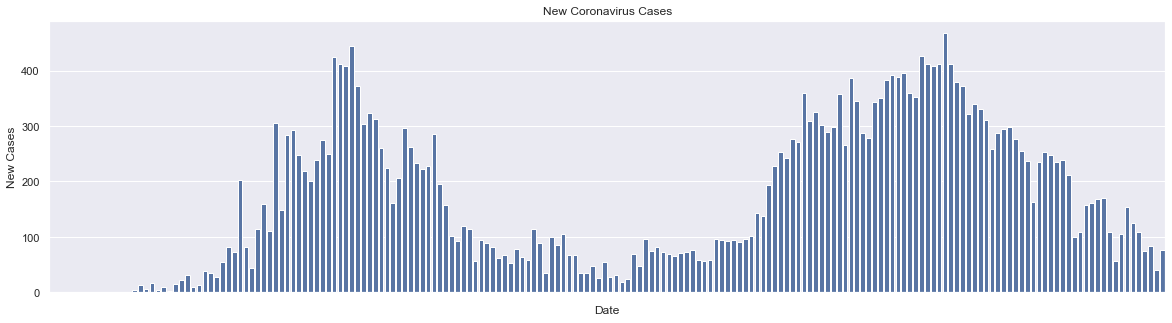

In [6]:
srb_rona = big_corona_data.loc[big_corona_data['iso_code'].isin(['SRB'])]
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='date', y='new_cases',color = 'b', data=srb_rona)
g.set(xticklabels=[])
g.set_xlabel("Date")
g.set_ylabel('New Cases')
g.set_title('New Coronavirus Cases')




Text(0.5, 1.0, 'New Coronavirus Deaths')

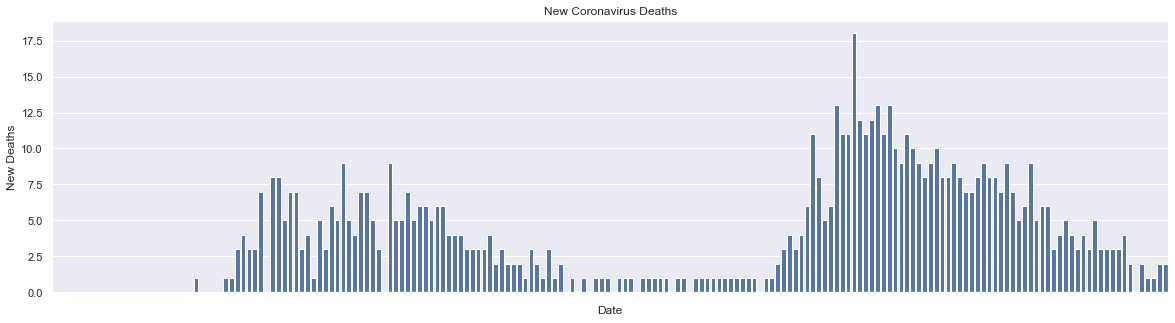

In [7]:
srb_rona = big_corona_data.loc[big_corona_data['iso_code'].isin(['SRB'])]
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
h = sns.barplot(x='date', y='new_deaths',color = 'b', data=srb_rona)
h.set(xticklabels=[])
h.set_xlabel("Date")
h.set_ylabel('New Deaths')
h.set_title('New Coronavirus Deaths')



In [8]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

big_testing_data = pd.read_csv(io.StringIO(download.decode('utf-8'))).drop(['Source URL', 'Notes', 'Source label'], 1)
testing_data = big_testing_data.loc[big_testing_data['ISO code'] == 'SRB']


##Testing trends for Covid-19 in Serbia

Text(0.5, 1.0, 'Daily Change in Coronavirus Testing')

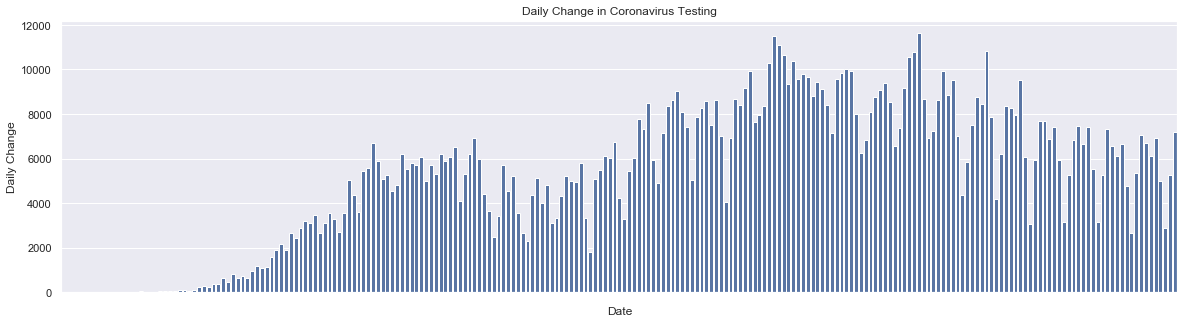

In [9]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
j = sns.barplot(x = 'Date', y = 'Daily change in cumulative total', color = 'b' ,data = testing_data)
j.set(xticklabels=[])
j.set_xlabel("Date")
j.set_ylabel('Daily Change')
j.set_title('Daily Change in Coronavirus Testing')



##Comparing Serbia to other European Countries adjusted for population: Coratia, France, Greece, and Italy.

Croatia and Greece have similar populations and GDP to Serbia but have been able to handle the virus much better. This could come down to a few things. One being pre-existing conditions and the other government response. The life expectancy, median age, and even number of male and female smokers are very similar when it comes to these three countries, however the diabetes prevalence and cardiovascular death rate differ greatly. Serbia’s diabetes rate is almost twice as high as the other countries and the cardiovascular death rate is also almost two times as large. This has to have an effect on the number of deaths and could possibly be why the deaths per million is much greater for Serbia than it is for Croatia and Greece. However, Greece and Croatia also have a significantly lower number of cases than Serbia, which could be the result of better government response. Greece’s response started with a hard lockdown at the beginning of the pandemic. All non-essential business was shut down to slow the spread, gatherings of more than 10 people were banned along with most international travel. This has made for a very low case count but it’s still not clear what economic consequences this will have on a country that is just recovering from a massive debt crisis as the lockdowns have still not been lifted. Croatia and Serbia itself had similar government responses with lockdowns and travel bans. The biggest difference in government response between Greece, Croatia and Serbia is that the restrictions were relaxed much sooner and much more dramatically in Serbia than anywhere else, leading to a massive second wave spike that is now starting to being seen by Croatia as it is relaxing restrictions.

Comparing Serbia’s response to those of larger, more powerful European countries such as France and Italy, shows a drastic difference in death rate, but a very similar plot of total cases adjusted for population, with Serbia recently having the most cases per million out of the chosen countries.  This is surprising, because Italy and France were two of the first hit European countries and both of them had death rates approaching 10% in late March and early April, during the first wave of the virus. Again, looking at population make up and pre-existing conditions, Serbia looks like they would be worse off with there being more pre-existing conditions and a slightly lower life expectancy. Also looking at GDP, countries with a higher GDP would be expected to have better healthcare and more hospital capacity, and France and Italy both have over twice the GDP per capita as Serbia. This is in contrast to what the data shows in that Serbia’s death rate is much lower, while the number of cases are the same adjusted for population.

In [10]:
more_countries_corona_data = big_corona_data.loc[big_corona_data['iso_code'].isin(['GRC', 'HRV', 'SRB', 'FRA', 'ITA'])]


Text(0, 0.5, 'Cases per Million')

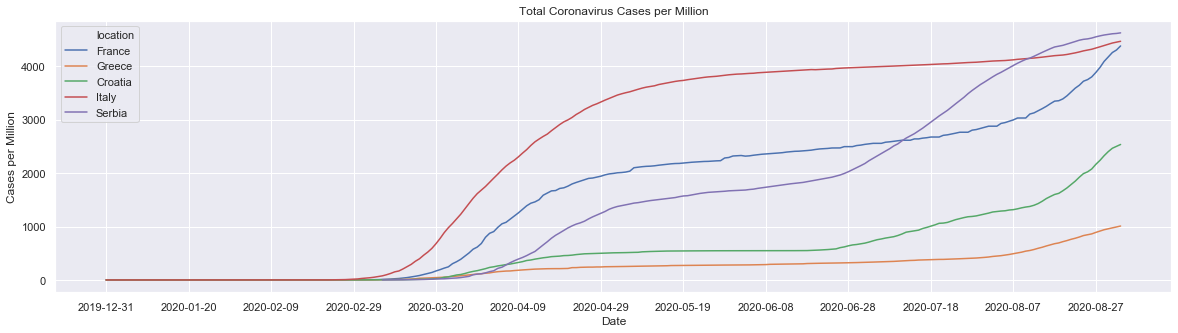

In [11]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
i = sns.lineplot(x = 'date', y = 'total_cases_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
i.set_title('Total Coronavirus Cases per Million')
i.set_xlabel('Date')
i.set_ylabel('Cases per Million')


Text(0, 0.5, 'New Coronavirus Cases per Million')

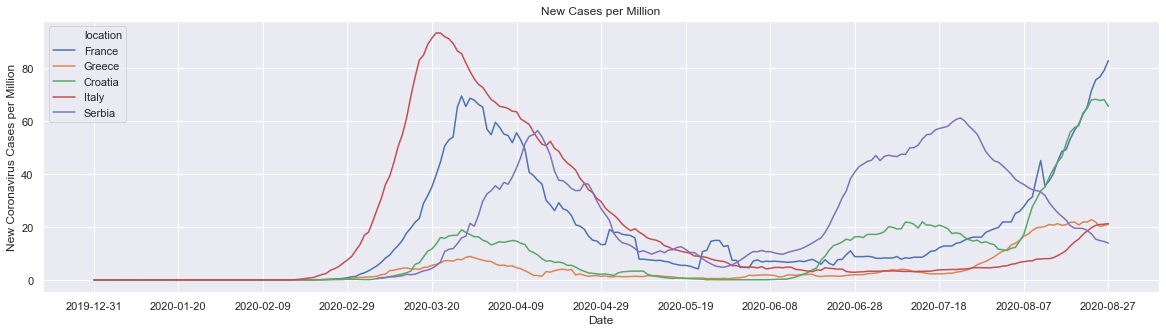

In [12]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
o = sns.lineplot(x = 'date', y = 'new_cases_smoothed_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
o.set_title('New Cases per Million')
o.set_xlabel('Date')
o.set_ylabel('New Coronavirus Cases per Million')



Text(0, 0.5, 'Deaths per Million')

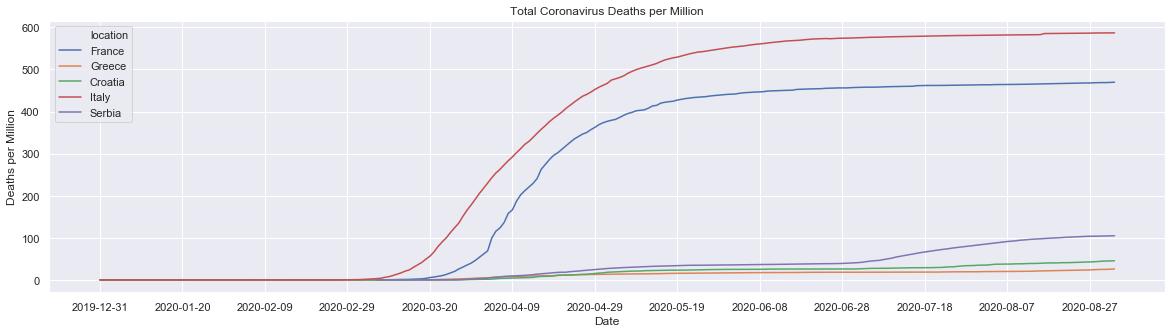

In [13]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
q = sns.lineplot(x = 'date', y = 'total_deaths_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
q.set_title('Total Coronavirus Deaths per Million')
q.set_xlabel('Date')
q.set_ylabel('Deaths per Million')


Text(0, 0.5, 'Deaths per Million')

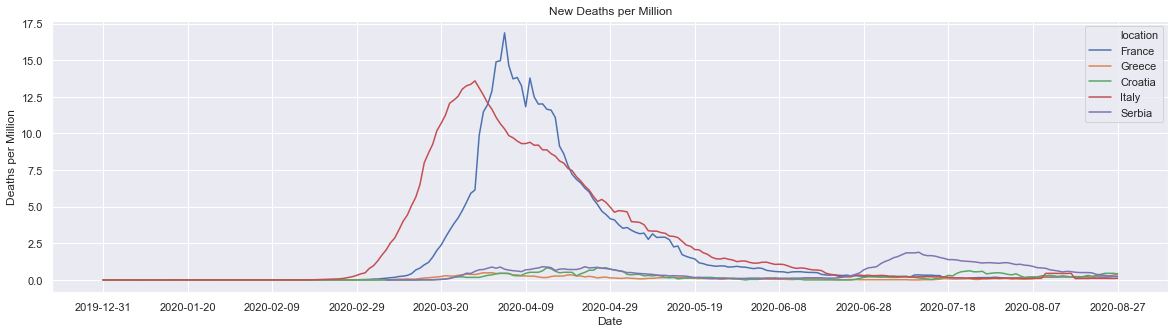

In [14]:
sns.set()
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
pos = np.arange(len(more_countries_corona_data['date']))
ticks = plt.xticks(pos[::20], more_countries_corona_data['date'].values[::20])
p = sns.lineplot(x = 'date', y = 'new_deaths_smoothed_per_million', hue = 'location', color = 'b' ,data = more_countries_corona_data)
p.set_title('New Deaths per Million')
p.set_xlabel('Date')
p.set_ylabel('Deaths per Million')



##Population statistics in Serbia, Croatia, France, Greece, and Italy

Text(0, 0.5, 'Population')

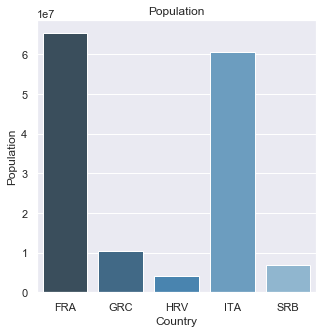

In [15]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
w = sns.barplot(x = 'iso_code', y = 'population', palette="Blues_d" ,data = more_countries_corona_data)
w.set_title('Population')
w.set_xlabel('Country')
w.set_ylabel('Population')

Text(0, 0.5, 'GDP')

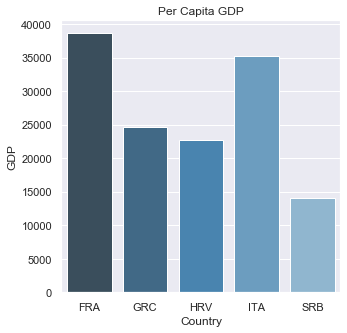

In [16]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
t = sns.barplot(x = 'iso_code', y = 'gdp_per_capita', palette="Blues_d" ,data = more_countries_corona_data)
t.set_title('Per Capita GDP')
t.set_xlabel('Country')
t.set_ylabel('GDP')

Text(0, 0.5, 'Age')

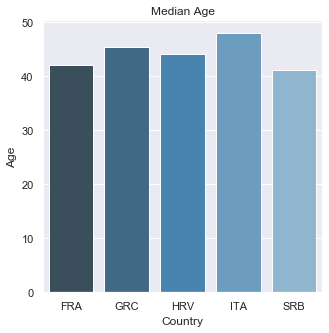

In [17]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
r = sns.barplot(y = 'median_age', x = 'iso_code', palette="Blues_d" ,data = more_countries_corona_data)
r.set_title('Median Age')
r.set_xlabel('Country')
r.set_ylabel('Age')


##Pre-existing Conditions in Serbia Compared to France, Greece, Croatia, and Italy

Text(0, 0.5, 'Prevalence')

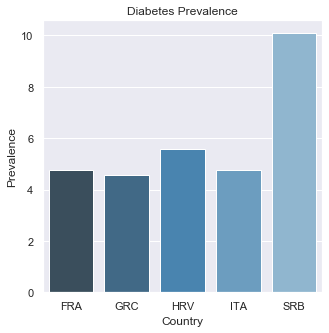

In [18]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
c = sns.barplot(x = 'iso_code', y = 'diabetes_prevalence', palette="Blues_d" ,data = more_countries_corona_data)
c.set_title('Diabetes Prevalence')
c.set_xlabel('Country')
c.set_ylabel('Prevalence')


Text(0, 0.5, 'Death Rate')

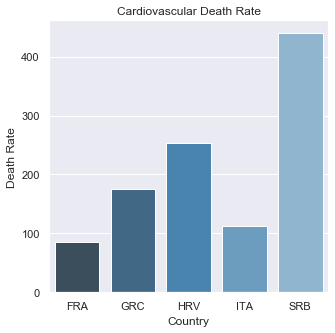

In [20]:
sns.set()
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
v = sns.barplot(x = 'iso_code', y = 'cardiovasc_death_rate', palette="Blues_d" ,data = more_countries_corona_data)
v.set_title('Cardiovascular Death Rate')
v.set_xlabel('Country')
v.set_ylabel('Death Rate')


Serbia’s coronavirus response has not been as good as it could have been, with similar countries doing a much better job to slow the spread of the virus through government actions and having a lower death toll in part because of Serbia’s much greater percentage of citizens with pre-existing conditions. If Serbia’s government acted with greater urgency at the beginning of the pandemic and didn’t reopen so quickly, the numbers could have looked more like Croatia and Greece, however as of right now Serbia is doing much worse with a large second wave sweeping through the country. 